# Data Analysis Project: Capital Bikeshare Bike Sharing Dataset
---
- Name: Alfira Nabillah Putri
- Email: alfiranabilll@gmail.com
- ID Dicoding: alfiranabillah

## Defining Business Questions
---

1. How is the trend in the number of bike-sharing rides in recent years?
2. What is the usage pattern of bike-sharing rides based on day of the week?
3. What are the differences in bicycle usage patterns between weekdays and weekends?
4. What season has the highest bike-sharing rides?
5. How does the number of registered and casual users compare?
6. Does weather affect bikeshare usage?

## Import the Libraries
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling
---

### Gathering Data

In [ ]:
df = pd.read_csv('/content/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Table overview
	- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit :
		- 1: Clear
		- 2: Cloudy
		- 3: Light Rain
		- 4: Heavy Rain
	- temp : Normalized temperature in Celsius.
	- atemp: Normalized feeling temperature in Celsius.
	- hum: Normalized humidity.
	- windspeed: Normalized wind speed in miles per hour.
	- casual: count of casual user rides
	- registered: count of registered user rides
	- cnt: count of total rental bike rides including both casual and registered

### Assessing Data

#### Check for Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Check for Missing Values

In [ ]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Apparently there are no missing values in the dataset

### Check for Duplicated Values

In [ ]:
df.duplicated().sum()

0

Apparently there are no duplicated values in the dataset

### Check Statistical Summary

In [ ]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
print(df.shape)

(731, 16)


The dataset consists of 731 rows and 16 columns


### Assessing Data Summary

### Cleaning Data

Perform data cleaning based on findings in data assessment

- Convert the `dteday` variable to date data type
- The `weekday` and `mnth` variables are represented in integer, we will change them into their respective string values.
- The `yr` variable are represented as 0 for year 2011 and 1 for year 2012. We will change them to their respective values.
- Convert the contents of the `season` and `weathersit` fields in accordance with the following conditions

### Convert `dteday` data type

In [ ]:
# convert dteday variable ot date data type
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Correct the values of `weekday` and `month` variables

In [ ]:
# find the weekday of each corresponding date
df['weekday'] = df['dteday'].dt.day_name()

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [ ]:
# find the month of each corresponding date
df['mnth'] = df['dteday'].dt.month_name()

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


#### Convert the contents of the season column with the provisions of 1:winter, 2:spring, 3:summer, 4:fall

---



In [ ]:
# replace season integer value with each corresponding season
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)

df['season'] = season_list

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


#### Convert the contents of the season column with the provisions of 1: clear; 2: cloudy; 3: ligt rain; 4: heavy rain

In [ ]:
# replace season integer value with each corresponding season
def find_weathersit(weathersit):
    weathersit_string = {1:'Clear', 2:'Cloudy', 3:'Light rain', 4:'Heavy rain'}
    return weathersit_string.get(weathersit)

weathersit_list = []

for weathersit in df['weathersit']:
    weathersit = find_weathersit(weathersit)
    weathersit_list.append(weathersit)

df['weathersit'] = weathersit_list

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349


### Correct the values of `yr` variable

In [ ]:
df['yr'] = df['dteday'].dt.year

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349


### Save the cleaned dataset

In [ ]:
df.to_csv("day_cleaned.csv", index=False)

## Exploratory Data Analysis
---

In [ ]:
df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
holiday,int64
weekday,object
workingday,int64
weathersit,object
temp,float64


In [ ]:
day_df = pd.read_csv('day_cleaned.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Summer,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Descriptive statistics of all columns in the dataframe show that the number of data is 731, the mean is 366, meaning that the data is spread on average around this index. The minimum and maximum values show a range from 1 to 731.

#### Total Usage by Year

In [ ]:
day_df.groupby(by="yr").agg({
    "cnt": ["sum"],
    "registered": ["sum"],
    "casual": ["sum"]
})

,cnt,registered,casual
,sum,sum,sum
yr,,,
2011,1243103,995851,247252
2012,2049576,1676811,372765


#### Total Usage by Day of the Week

In [ ]:
day_df.groupby(by="weekday").agg({
    "cnt": ["sum"],
    "registered": ["sum"],
    "casual": ["sum"]
})

,cnt,registered,casual
,sum,sum,sum
weekday,,,
Friday,487790,409552,78238
Monday,455503,384719,70784
Saturday,477807,323955,153852
Sunday,444027,303506,140521
Thursday,485395,423935,61460
Tuesday,469109,411266,57843
Wednesday,473048,415729,57319


#### Total Usage by Weekday and Holiday


In [ ]:
result = day_df.groupby(by="workingday").agg({
    "cnt": ["sum"]
})

# Mengganti indeks 0 dan 1 dengan label yang lebih jelas di output
result.index = result.index.map({0: 'Holiday', 1: 'Working Day'})

result

,cnt
,sum
workingday,
Holiday,1000269
Working Day,2292410


#### Total Usage Based by Weather

In [ ]:
day_df.groupby(by="weathersit").agg({
    "cnt": ["sum"],
    "registered": ["sum"],
    "casual": ["sum"]
})

,cnt,registered,casual
,sum,sum,sum
weathersit,,,
Clear,2257952,1811606,446346
Cloudy,996858,827082,169776
Light rain,37869,33974,3895


#### Total Usage by User Type

In [ ]:
registered_casual_agg = day_df.agg({
    "registered": "sum",
    "casual": "sum"
})

registered_casual_agg

,0
registered,2672662
casual,620017


#### Total Usage by Seasons

In [ ]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,Summer,1061129
1,Spring,918589
2,Fall,841613
3,Winter,471348


## Visualization and Explanatory Analysis

In this chapter, we will answer the questions defined above.

1. What is the trend in the number of bicycle users in recent years?
2. Which day of the week shows the highest overall bicycle rental usage?
3. How do weekday and weekend rental patterns differ?
4. Which season has the highest number of bicycle rentals?
5. Do registered users rent bikes more frequently than casual users?
6. How does weather influence the rental habits of users?



### 1. How is the trend in the number of bike-sharing rides in recent years?



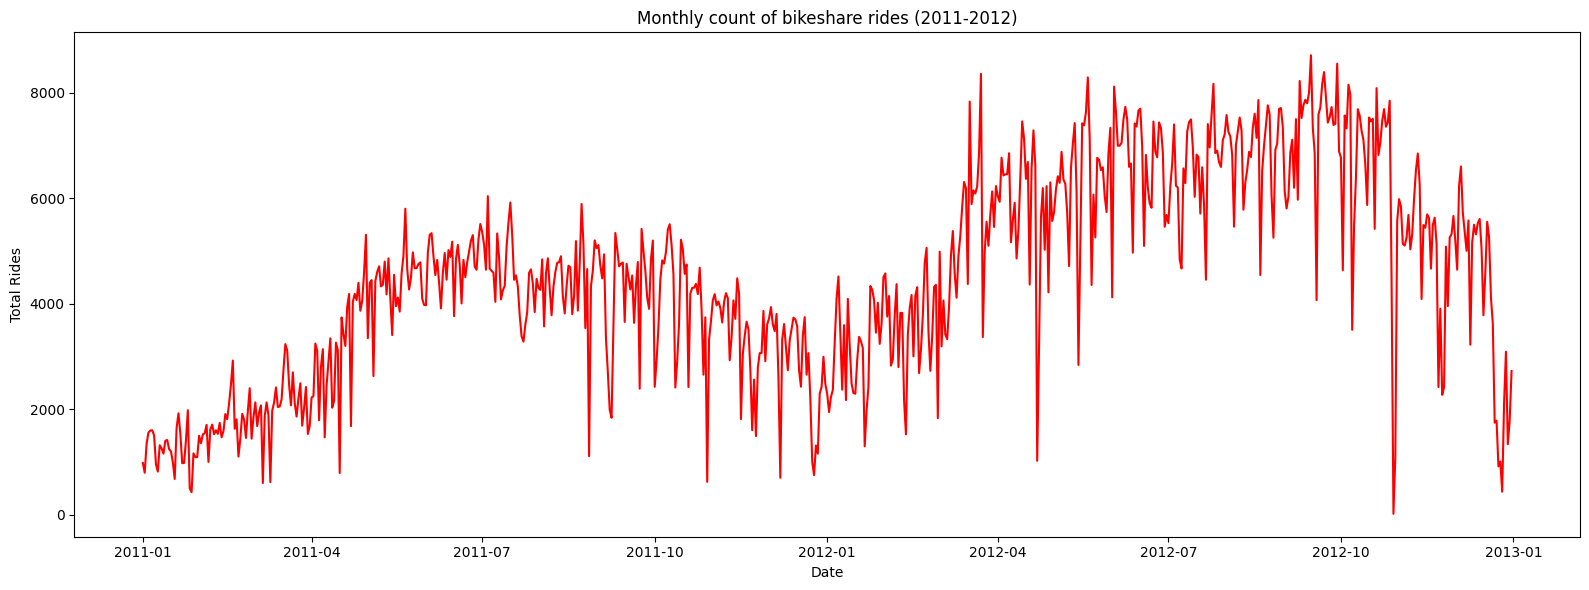

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

- The count of rides starts low in the beginning of each year, then starts to increase in the middle of the year, then decreased nearing the end of each year.
- The number of users seems higher in 2012 than in 2011.

In [ ]:
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')
monthly_users_df.head(24)

<ipython-input-31-478fc7319f1f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users_df = df.resample(rule='M', on='dteday').agg({


,cnt,casual,registered
dteday,,,
Jan-11,38189,3073,35116
Feb-11,48215,6242,41973
Mar-11,64045,12826,51219
Apr-11,94870,22346,72524
May-11,135821,31050,104771
Jun-11,143512,30612,112900
Jul-11,141341,36452,104889
Aug-11,136691,28842,107849
Sep-11,127418,26545,100873


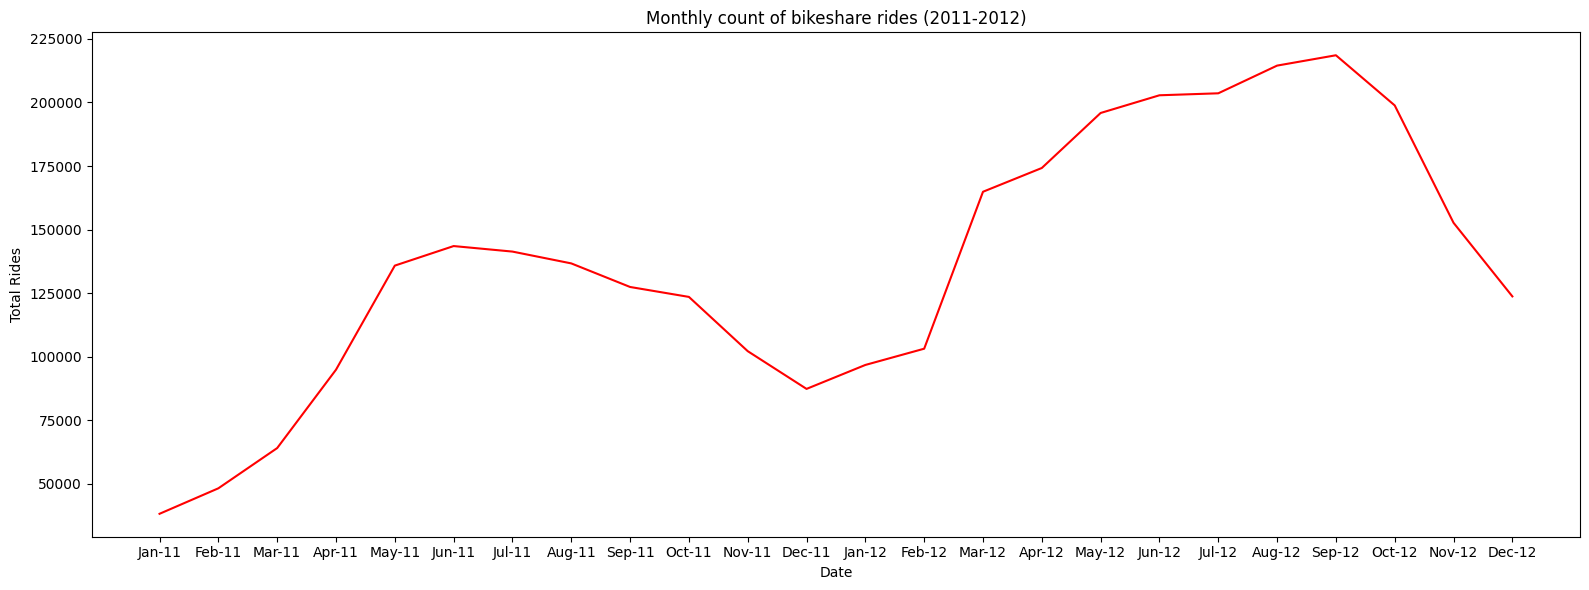

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=monthly_users_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

To make it more interpretable, I also created a visualization based on months in 2011-2012. Based on the visualization, we can see that the highest amount of usage occurred in September 2012. In addition, there was a significant drop at the end of 2012 (October - December 2012)

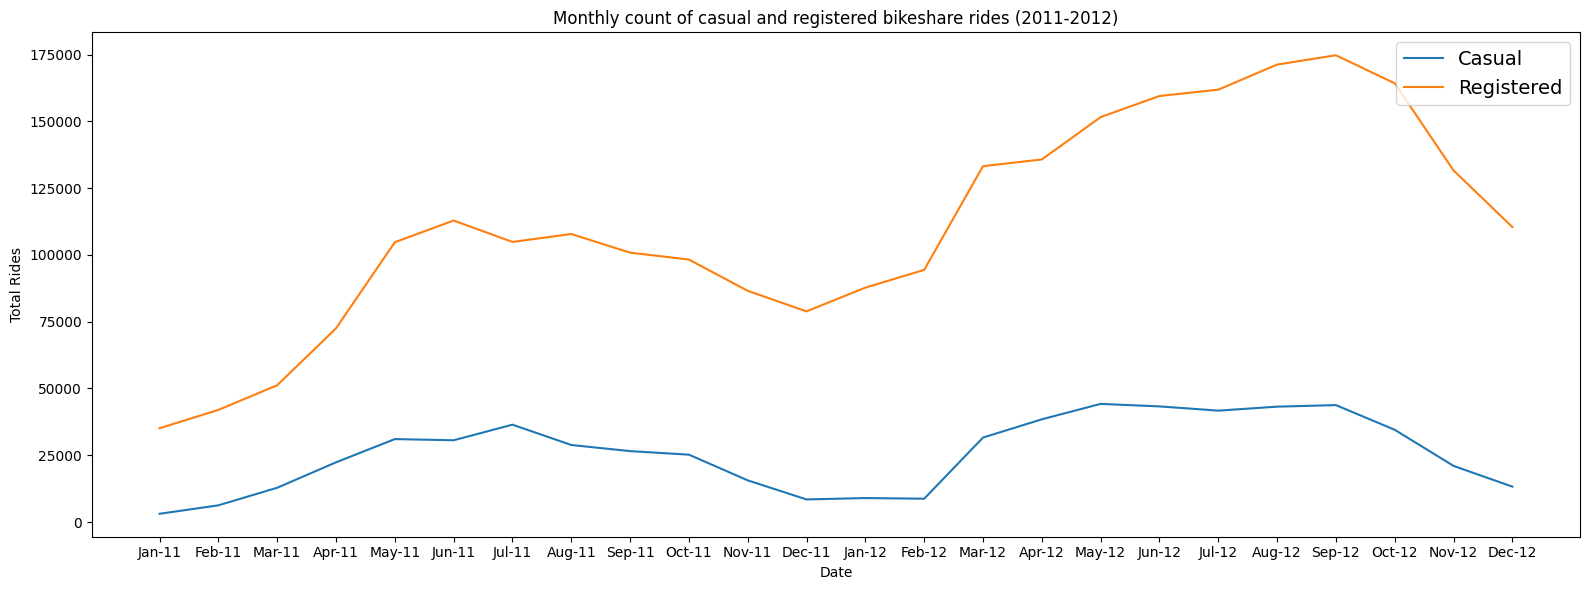

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=monthly_users_df, label='Casual')
sns.lineplot(x="dteday", y="registered", data=monthly_users_df, label='Registered')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. The total number of bikeshare rides in 2012 is higher than in 2011, indicating overall growth in bike usage across the two years.
2. The count of bikeshare rides typically starts low in start of the year, then beginning to increase in Q2, then starts to decrease in Q4.
3. Registered rides consistently outnumber casual rides, but both follow a similar yearly trend, with peaks in summer and dips in winter.

### 2. What is the usage pattern of bike-sharing rides based on day of the week?

<ipython-input-34-be33f131a00b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_usage.index, y=day_usage.values, palette ='Blues_d')


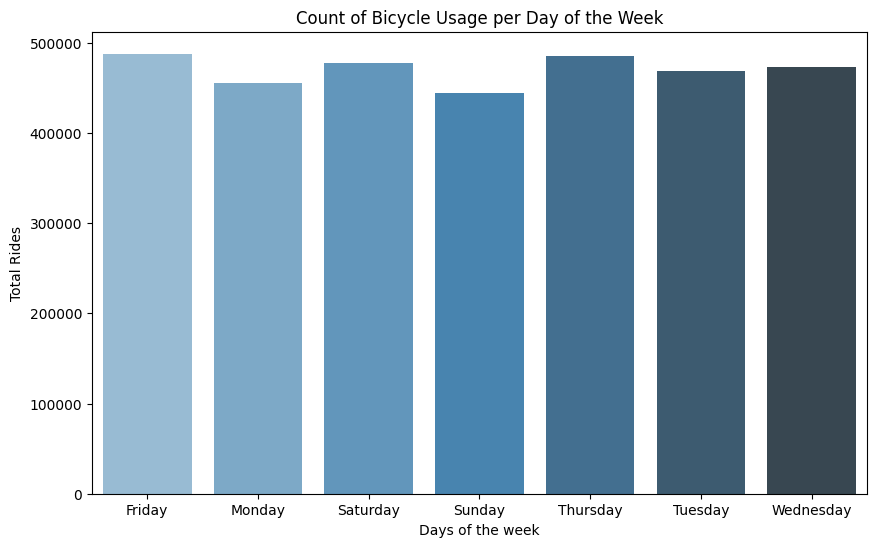

In [ ]:
plt.figure(figsize=(10, 6))
day_usage = day_df.groupby('weekday')['cnt'].sum()
sns.barplot(x=day_usage.index, y=day_usage.values, palette ='Blues_d')
plt.title("Count of Bicycle Usage per Day of the Week")
plt.xlabel("Days of the week")
plt.ylabel("Total Rides")
plt.show()

It seems that the number of bikeshare users is spread fairly evenly during weekdays. However, on Fridays, there is more bikeshare usage compared to other days.

<Figure size 1800x600 with 0 Axes>

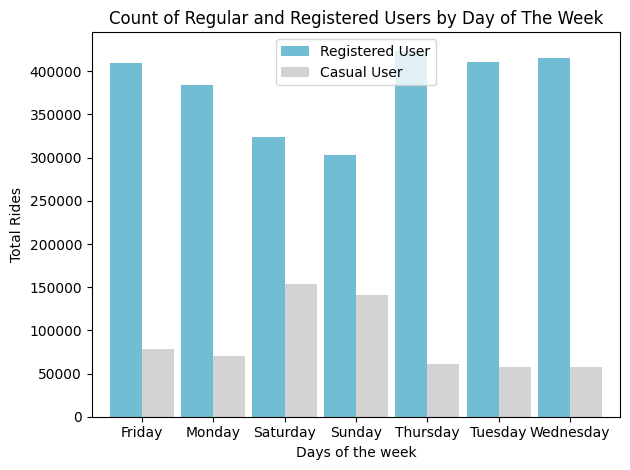

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))  # Memperlebar keseluruhan grafik
weekday_users = day_df.groupby('weekday')[['registered', 'casual']].sum()

# Mengatur lebar bar dengan menambahkan parameter `width`
weekday_users.plot(kind='bar', width=0.9, stacked=False, color=["#72BCD4","#D3D3D3"])

plt.title("Count of Regular and Registered Users by Day of The Week")
plt.xlabel("Days of the week")
plt.ylabel("Total Rides")
plt.legend(["Registered User", "Casual User"])
plt.xticks(rotation=0)
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()

**Insight**
1. The number of trips for casual users is higher on weekends, while for registered users it is higher on weekdays.
2. Registered users may be using the bike for work regularly on weekdays, while casual users are using the bike for leisure on weekends.

### 3. What are the differences in bicycle usage patterns between weekdays and weekends?


<ipython-input-36-20813af1530c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='workingday_label', y='cnt', estimator='sum', palette = ["#D3D3D3","#72BCD4"])


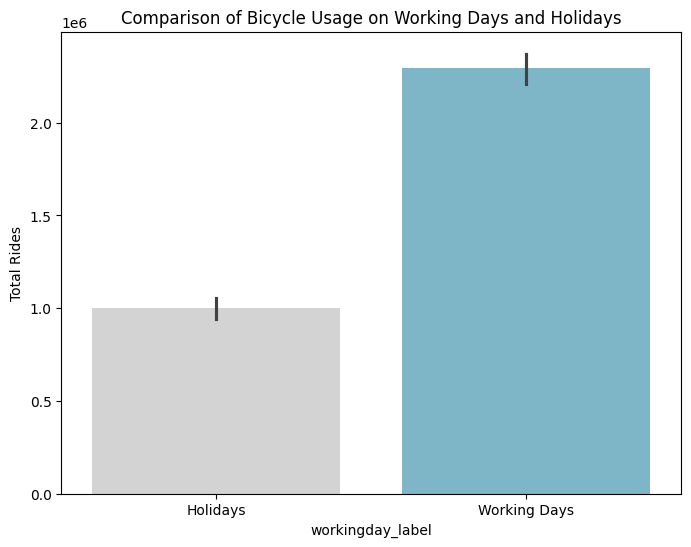

In [ ]:
day_df['workingday_label'] = day_df['workingday'].replace({0: 'Holidays', 1: 'Working Days'})

plt.figure(figsize=(8, 6))
sns.barplot(data=day_df, x='workingday_label', y='cnt', estimator='sum', palette = ["#D3D3D3","#72BCD4"])
plt.title("Comparison of Bicycle Usage on Working Days and Holidays")
plt.ylabel("Total Rides")
plt.show()

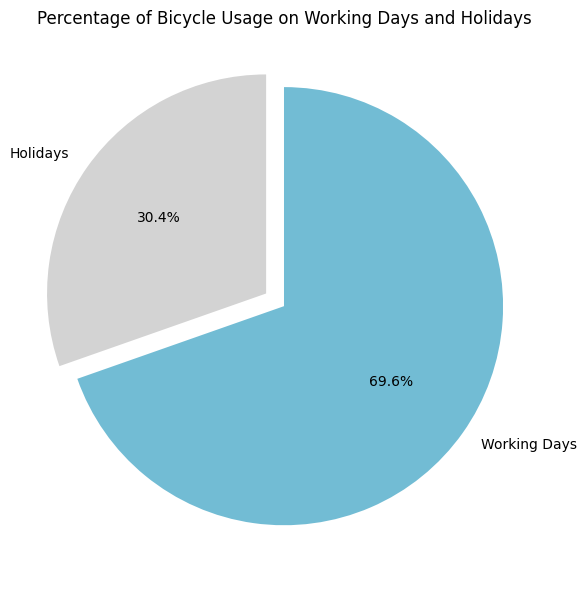

In [ ]:
import matplotlib.pyplot as plt

# Membuat label untuk hari kerja dan libur
day_df['workingday_label'] = day_df['workingday'].replace({0: 'Holidays', 1: 'Working Days'})

# Mengelompokkan data berdasarkan label dan menghitung jumlah rides
workingday_summary = day_df.groupby('workingday_label')['cnt'].sum()

# Membuat pie chart
plt.figure(figsize=(8, 6))
colors = ["#D3D3D3", "#72BCD4"]
workingday_summary.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=workingday_summary.index,
    explode=(0.1, 0)  # Membuat "Holidays" sedikit menonjol
)

plt.title("Percentage of Bicycle Usage on Working Days and Holidays")
plt.ylabel("")  # Menghapus label default untuk menjaga tampilan bersih
plt.tight_layout()
plt.show()

**Insight**

- The total number of bike rides on working days is significantly higher than on holidays.
-  The significant volume still shows demand for bike-sharing on non-working days
- Both working days and holidays show relatively consistent bike usage patterns, with lower variability. This suggests stable, predictable demand for bike-sharing, especially on workdays, which could help in planning and maintenance schedules.

### 4. What season has the highest bike-sharing rides?

<ipython-input-37-e16868d5bc13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_usage.index, y=season_usage.values, palette="Blues_d")


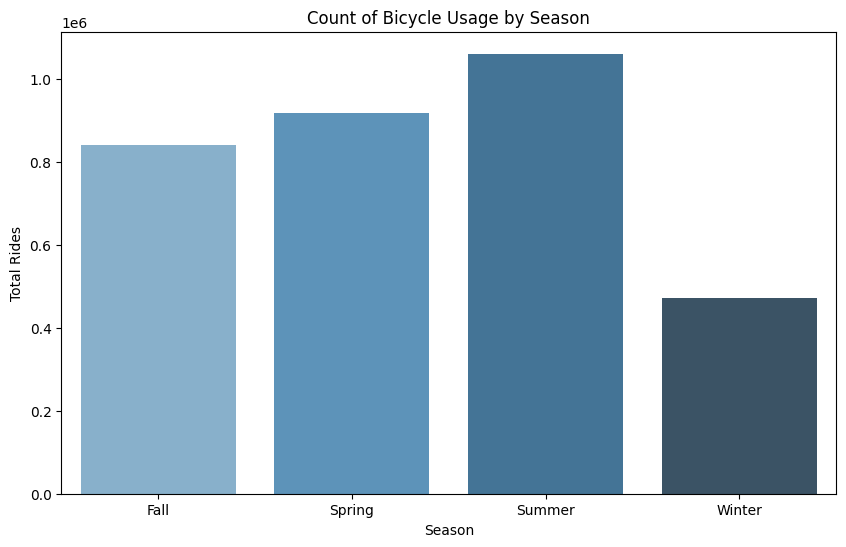

In [ ]:
plt.figure(figsize=(10, 6))
season_usage = day_df.groupby('season')['cnt'].sum()
sns.barplot(x=season_usage.index, y=season_usage.values, palette="Blues_d")
plt.title("Count of Bicycle Usage by Season")
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.show()

The count of bikeshare users are highest during Summer season, and lowest during Winter season.



<Figure size 1000x600 with 0 Axes>

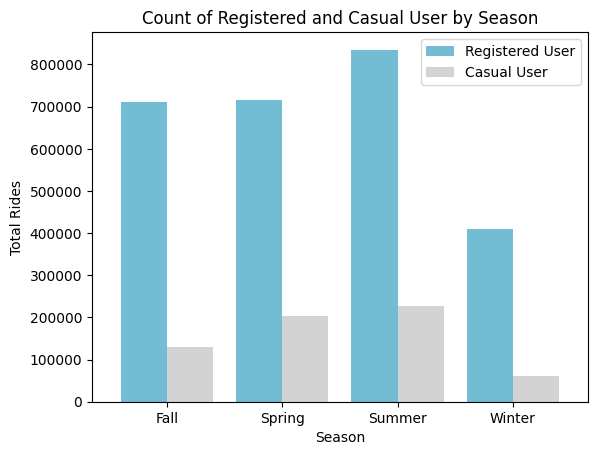

In [ ]:
plt.figure(figsize=(10, 6))
season_users = day_df.groupby('season')[['registered', 'casual']].sum()
season_users.plot(kind='bar', width= 0.8, stacked=False, color= ["#72BCD4","#D3D3D3"])
plt.title("Count of Registered and Casual User by Season")
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.legend(["Registered User", "Casual User"])
plt.xticks(rotation=0)
plt.show()

**Insight**
- The count of bikeshare rides are highest during Summer season, and lowest during Winter season.
- There are no major difference between casual and registered rides pattern during season, both are highest in Summer and lowest during Winter.

### 5. How does the number of registered and casual users compare?

<ipython-input-39-dcf3646b9600>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=[ "#72BCD4","#D3D3D3"])


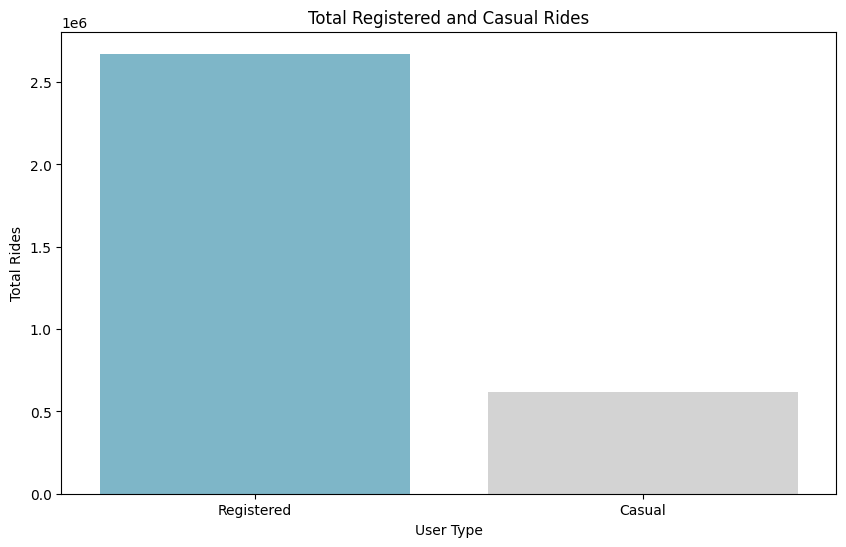

Count of registered users: 2672662
Count of casual users: 620017


In [ ]:
registered_sum = df['registered'].sum()
casual_sum = df['casual'].sum()

plt.figure(figsize=(10,6))

# Create a bar chart using the plt.bar() function
sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=[ "#72BCD4","#D3D3D3"])

# Add labels and a title to the plot
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

# Show the plot
plt.show()

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")

The number of registered bikeshare users are higher than higher than casual users



In [ ]:
registered_casual_agg = day_df.agg({
    "registered": "sum",
    "casual": "sum"
})

# Menghitung total semua penggunaan sepeda
total_usage = registered_casual_agg["registered"] + registered_casual_agg["casual"]

# Menghitung persentase masing-masing jenis pengguna
registered_percent = (registered_casual_agg["registered"] / total_usage) * 100
casual_percent = (registered_casual_agg["casual"] / total_usage) * 100

# Menampilkan hasil
print("Persentase Pengguna Terdaftar: {:.1f}%".format(registered_percent))
print("Persentase Pengguna Kasual: {:.1f}%".format(casual_percent))

Persentase Pengguna Terdaftar: 81.2%
Persentase Pengguna Kasual: 18.8%


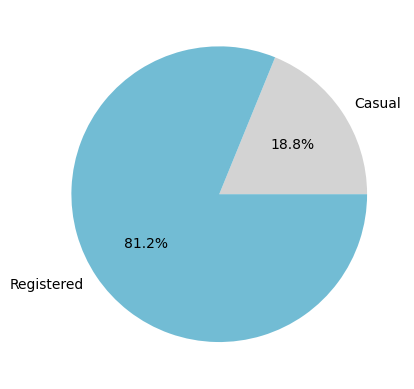

In [ ]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

**Insight**
- When converted into percentages, we can see that 81.2% of bike-sharing users are registered users, while only 18.8% are regular users.
- The high percentage of registered users indicates a loyal user base, indicating that bike-sharing services are more likely to meet regular commuting or transportation needs rather than being used for casual and occasional trips.

### 6. Does weather affect bikeshare usage?


<ipython-input-42-d3c0168c3f86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_usage.index, y=season_usage.values, palette="Blues_d")


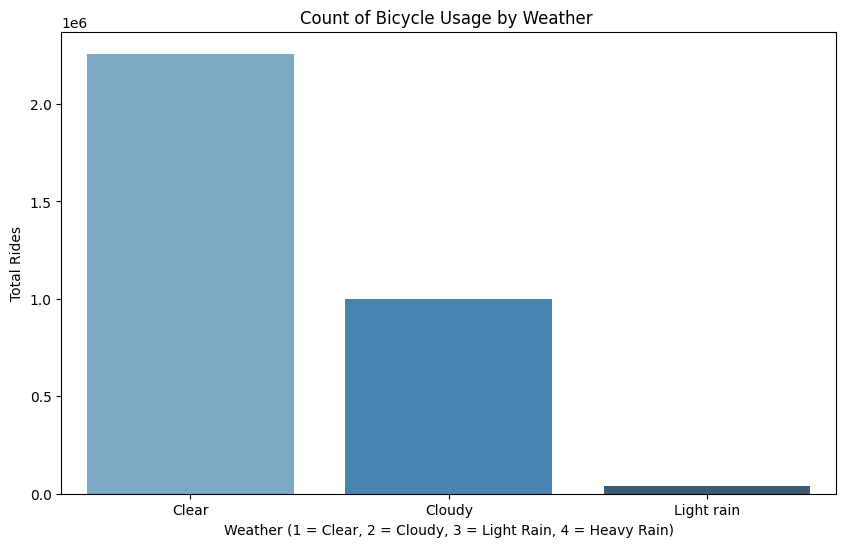

In [ ]:
plt.figure(figsize=(10, 6))
season_usage = day_df.groupby('weathersit')['cnt'].sum()
sns.barplot(x=season_usage.index, y=season_usage.values, palette="Blues_d")
plt.title("Count of Bicycle Usage by Weather ")
plt.xlabel("Weather (1 = Clear, 2 = Cloudy, 3 = Light Rain, 4 = Heavy Rain)")
plt.ylabel("Total Rides")
plt.show()

<Figure size 1000x600 with 0 Axes>

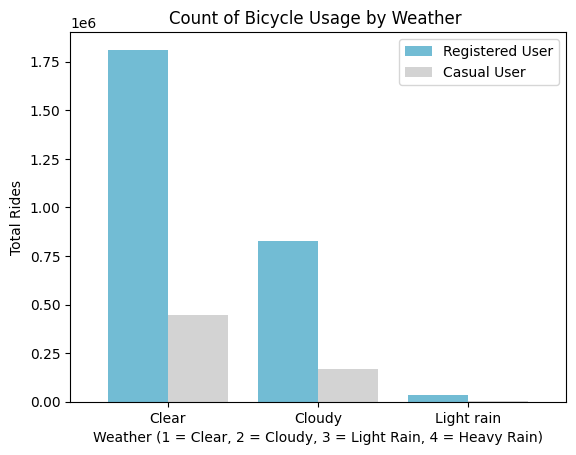

In [ ]:
plt.figure(figsize=(10, 6))
season_users = day_df.groupby('weathersit')[['registered', 'casual']].sum()
season_users.plot(kind='bar', width= 0.8, stacked=False, color=["#72BCD4","#D3D3D3"])
plt.title("Count of Bicycle Usage by Weather ")
plt.xlabel("Weather (1 = Clear, 2 = Cloudy, 3 = Light Rain, 4 = Heavy Rain)")
plt.ylabel("Total Rides")
plt.legend(["Registered User", "Casual User"])
plt.xticks(rotation=0)
plt.show()

**Insight**
-  The majority of bike rides take place on clear weather days, with registered users riding significantly more than casual users. This suggests that pleasant weather encourages more frequent use, especially among those who already have a regular pattern of bike usage.
- Both casual and registered users tend to reduce their bike usage on cloudy days, and this decline becomes more pronounced with light rain.
- In heavy rain, bike usage nearly vanishes for both user types.

## Further Analysis
---

### RFM Analysis


RFM analysis to understand user engagement patterns (especially registered users, as they are repeat customers).
- Recency: Measures how recent the user's last activity was. We can look at the date ( dteday column) to determine when the last time a userregistered activity in the data.
- Frequency: Measures how often a registered user uses the service in a certain period of time (for example, in a month or in a year). Frequency can be calculated from the number of days a registered user interacts.
- Monetary: In this context, monetary can be defined as the total activity generated by registered users in a given period. We can use the number of registered users (registered) or total usage (cnt) as values.

In [ ]:
import pandas as pd

# Assuming day_df is your DataFrame
now = pd.to_datetime(day_df['dteday'].max())  # Convert 'now' to datetime

recency_data = day_df.groupby('yr').agg({
    'dteday': lambda x: (now - pd.to_datetime(x.max())).days  # Convert x.max() to datetime
}).rename(columns={'dteday': 'Recency'})

In [ ]:
frequency_monetary_data = day_df.groupby('yr').agg({
    'dteday': 'count',                # Frequency: jumlah hari dengan penggunaan
    'registered': 'sum'               # Monetary: total penggunaan untuk pengguna terdaftar
}).rename(columns={'dteday': 'Frequency', 'registered': 'Monetary'})

In [ ]:
rfm_data = recency_data.join(frequency_monetary_data).reset_index()

In [ ]:
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4])

In [ ]:
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

In [ ]:
rfm_data['Customer_Segment'] = rfm_data['RFM_Score'].apply(lambda x: 'Best Customers' if x == '444' else 'Others')

In [ ]:
print(rfm_data)

     yr  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
0  2011      366        365    995851       1       1       1       111   
1  2012        0        366   1676811       4       4       4       444   

  Customer_Segment  
0           Others  
1   Best Customers  


**Insight**

- Registered users in 2012 are Best Customers, as they are very active, use the bike frequently, and have high total usage.
- Registered users in 2011 are Others, as they are no longer active, and have low frequency and value of use.

## Conclusion
---

### 1. How is the trend in the number of bike-sharing rides in recent years?

> The number of bikeshare rides in 2012 was higher than in 2011. Both years showed the same trend and seasonality, with the number of rides increasing in the middle of the year and decreasing at the beginning and end of the year.

### 2. What is the usage pattern of bike-sharing rides based on day of the week?
---



- For registered users, the number of rides was higher during weekdays. This is consistent with the findings in question 2, suggesting that registered users likely used the bikes to commute to work.
- For casual users, the number of rides was higher on weekends than on weekdays, indicating that they used the bikes for leisure activities on weekends.

### 3. What are the differences in bicycle usage patterns between weekdays and weekends?

---



* Bicycle usage is significantly higher on working days, accounting for 69.6% of total usage.
* Usage during holidays is notably lower, making up only 30.4%.
* Bicycle usage is more prevalent on weekdays compared to weekends or holidays. This indicates that bicycles are likely used more frequently for commuting or work-related purposes rather than for leisure activities during holidays.

### 4. What season has the highest bike-sharing rides?

---

> Bikeshare rides were highest during the summer season and lowest during the winter season.

### 5. How does the number of registered and casual users compare?



* Registered users account for a significant majority, comprising 81.2% of the total users.
* Casual users represent only 18.8% of the total.
The number of registered users is substantially higher than casual users.
* This indicates that most users prefer to register, possibly due to benefits or additional access granted upon registration.

### 6. Does weather affect bikeshare usage?

> Yes, weather plays a big role in influencing bikeshare usage habits. The number of rides is significantly higher during clear weather compared to more extreme weather conditions such as rain.
